# Engineering Analysis Request: Structural Integrity of Tapered Wind Turbine Spar

**Project ID:** WT-SPAR-004
**Date:** December 25, 2025
**Subject:** Aero-Elastic Analysis and Optimization of Variable Cross-Section Cantilever Beam

---

## 1. Executive Summary
The objective of this analysis is to evaluate the structural viability of a proposed tapered steel spar for a 20-meter wind turbine blade. The component acts as the primary load-bearing member and must withstand aerodynamic loading without experiencing plastic deformation (yielding) or excessive deflection that could compromise tower clearance. The analysis requires a numerical solution to the Euler-Bernoulli beam equations, accounting for the non-prismatic (variable stiffness) nature of the geometry.

## 2. Design Specifications

### 2.1 Geometric Definition
The spar is defined as a hollow rectangular box beam with linearly tapering outer dimensions.

* **Total Span ($L$):** 20.0 meters
* **Root Dimensions ($x=0$):**
    * Height ($H_{root}$): 0.80 m
    * Width ($B_{root}$): 0.50 m
* **Tip Dimensions ($x=L$):**
    * Height ($H_{tip}$): 0.20 m
    * Width ($B_{tip}$): 0.10 m
* **Wall Thickness ($t$):** 0.02 m (Constant)

### 2.2 Material Properties (Isotropic Structural Steel)
* **Young's Modulus ($E$):** 210 GPa ($210 \times 10^9$ Pa)
* **Yield Strength ($\sigma_y$):** 350 MPa ($350 \times 10^6$ Pa)

## 3. Loading Conditions
The spar is subject to a distributed aerodynamic load $w(x)$ acting perpendicular to the longitudinal axis. The load intensity is maximum at the root and decreases linearly to zero at the tip.

* **Load Function:**
    $$w(x) = w_{max} \left(1 - \frac{x}{L}\right)$$
* **Peak Load Intensity ($w_{max}$):** 8.0 kN/m

## 4. Theoretical Framework

The analysis shall be conducted under the assumptions of **Euler-Bernoulli Beam Theory** for a cantilevered beam. Due to the variable cross-section, the Area Moment of Inertia $I(x)$ is a function of position, necessitating numerical integration.

### 4.1 Governing Equations
1.  **Shear Force ($V$):**
    $$V(x) = \int_{x}^{L} w(\xi) \, d\xi$$
2.  **Bending Moment ($M$):**
    $$M(x) = \int_{x}^{L} V(\xi) \, d\xi$$
3.  **Flexural Stress ($\sigma$):**
    $$\sigma(x) = \frac{M(x) \cdot c(x)}{I(x)}$$
    *Where $c(x) = H(x)/2$*
4.  **Elastic Curve (Deflection $y$):**
    $$\frac{d^2y}{dx^2} = \frac{M(x)}{E \cdot I(x)}$$

### 4.2 Boundary Conditions
* **At Root ($x=0$):** Deflection $y(0) = 0$; Slope $\theta(0) = 0$.
* **At Tip ($x=L$):** Shear $V(L) = 0$; Moment $M(L) = 0$.

## 5. Scope of Work & Deliverables

The engineer is required to develop a computational script (Python/NumPy) to perform the following tasks:

1.  **Discretization:** Divide the beam domain into a minimum of 1000 finite elements.
2.  **Geometric Computation:** Generate arrays for $H(x)$, $B(x)$, and Moment of Inertia $I(x)$ across the span.
3.  **Numerical Integration:** Compute shear force, bending moment, slope, and deflection profiles using numerical methods (e.g., cumulative trapezoidal integration).
4.  **Failure Analysis:**
    * **Stress Criterion:** Verify $\sigma_{max} < \sigma_y$.
    * **Stiffness Criterion:** Verify maximum tip deflection $\delta_{max} < 1.5$ m.
5.  **Reporting:** Generate a graphical report displaying:
    * Bending Stress distribution vs. Yield Limit.
    * Deflection profile of the blade.

---

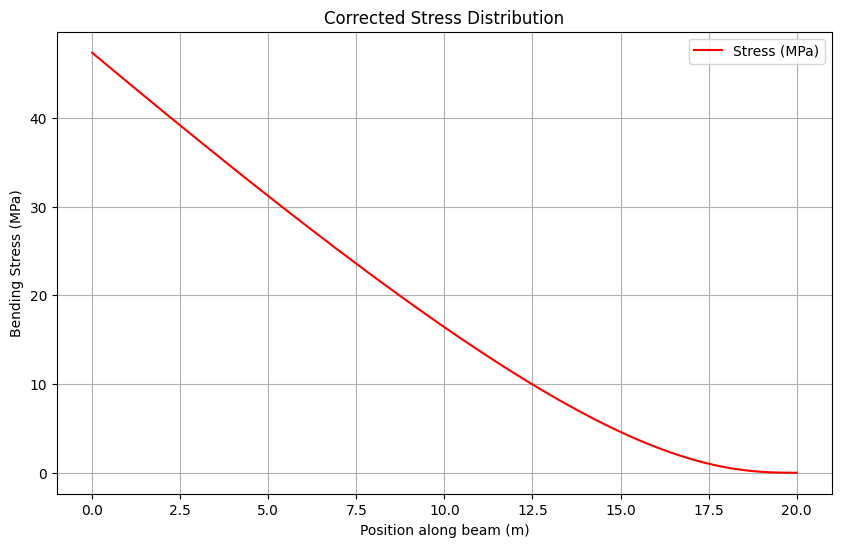

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Constants 
L = 20
t = 0.02
height_max, height_min = 0.8, 0.2
width_max, width_min = 0.5, 0.1

x = np.linspace(0, 20, 2000)
height = np.linspace(height_max, height_min, len(x))
h_in = height - 2*t
width  = np.linspace(width_max, width_min, len(x))
w_in = width - 2*t

# 3. Moment of Inertia (I)
I = (1/12) * (width * height**3 - w_in * h_in**3)

# 4. Loads (Numerical Integration)
w_max = 8.e3
w = w_max * (1 - x/L)

# Integrate backwards from tip (where V=0 and M=0) to root
V = integrate.cumulative_trapezoid(w[::-1], x[::-1], initial=0)[::-1]
M = integrate.cumulative_trapezoid(V[::-1], x[::-1], initial=0)[::-1]

# 5. Stress
c = height / 2
sigma = (M * c) / I

# 6. Plot
plt.figure(figsize=(10, 6))
plt.plot(x, sigma/1e6, label="Stress (MPa)", color="red")
plt.xlabel("Position along beam (m)")
plt.ylabel("Bending Stress (MPa)")
plt.title("Corrected Stress Distribution")
plt.grid(True)
plt.legend()
plt.show()